# ML models for computed band gap of HOIPs
#### Huan Tran, Georgia Institute of Technology

This notebook is a part of [V. N. Tuoc, Nga. T. T. Nguyen, V. Sharma, and T. D. Huan, *Probabilistic deep learning approach for targeted hybrid organic-inorganic perovskites*, Physical Review Materials 5, 125402 (2021); https://doi.org/10.1103/PhysRevMaterials.5.125402], and is also an example of matsML toolkit. Results obtained here can be found in this work.

The original (raw) dataset containing the computed band gap of 1,346 atomic structures predicted for 192 chemical compositions of hybrid organic-inorganic perovskites (HOIPs) is available at [C. Kim, T.D. Huan, S. Krishnan, and R. Ramprasad, Scientific Data 4, 170057 ('17); https://www.nature.com/articles/sdata201757]. Here, three fingerprinted versions of this dataset (S1, S2, and S3) will be fetched from http://www.matsml.org/ and learned to develop 5 ML models (M1, M2, M3, M4, and M5), which are based on Gaussian Process Regression, fully connected Neural Net, and Probability Neural Net. Computations performed using matsML toolkit, available at https://github.com/huantd/matsml.git.

Among 5 models developed, M5 demonstrates a reasonable way to handle the aleatoric uncertainty in deep learning of materials data. More details on this topic can be found in "*Probabilistic deep learning approach for targeted hybrid organic-inorganic perovskites*", the reference mentioned above.

### 1. Download data
Three (fingerprinted) datasets (S1, S2, and S3) used for the work will be obtained. In fact, S2 has 2 versions, one with selector and one not.

In [1]:
from matsml.data import Datasets

data=Datasets(S1='fp_hoips_S1_1dest',S2a='fp_hoips_S2a_2dest',
              S2b='fp_hoips_S2b_1dest',S3='fp_hoips_S3_4tfp')
data.load_dataset()

  matsML, v1.2.0
  *****
  Load requested dataset(s)
  Data saved in fp_hoips_S1_1dest.csv.gz
  Data saved in fp_hoips_S2a_2dest.csv.gz
  Data saved in fp_hoips_S2b_1dest.csv.gz
  Data saved in fp_hoips_S3_4tfp.csv.gz


### 2. Obtained datasets parameters

In [2]:
# data parameters for learning

n_trains=0.9              # 90% for training, 10% for test
sampling='random'         # method for train/test spliting
x_scaling='minmax'        # method for x scaling
y_scaling='minmax'        # method for y scaling

# Dict of data parameters
data1_params={'data_file':'fp_hoips_S1_1dest.csv.gz','id_col':['ID'],'y_cols':['Ymean'],'comment_cols':[],
    'y_scaling':y_scaling,'x_scaling':x_scaling,'sampling':sampling,'n_trains':n_trains}

data2a_params={'data_file':'fp_hoips_S2a_2dest.csv.gz','id_col':['ID'],'y_cols':['Ymean','Ystd'],
    'comment_cols':[],'y_scaling':y_scaling,'x_scaling':x_scaling,'sampling':sampling,'n_trains':n_trains}

data2b_params={'data_file':'fp_hoips_S2b_1dest.csv.gz','id_col':['ID'],'y_cols':['prop_value'],
    'comment_cols':['Ymean','Ystd','hid'],'y_scaling':y_scaling,'x_scaling':x_scaling,
    'sampling':sampling,'n_trains':n_trains}

data3_params={'data_file':'fp_hoips_S3_4tfp.csv.gz','id_col':['ID'],'y_cols':['Egap'],'comment_cols':[],
    'x_scaling':x_scaling,'y_scaling':'none', 'sampling':sampling,'n_trains':1.0}

### 3. ML Models
#### 3a. Model M1: GPR on S1

  
  Checking parameters
    all passed                   True
 
  Learning fingerprinted/featured data
    algorithm                    gaussian process regression w/ scikit-learn
    nfold_cv                     5
    optimizer                    fmin_l_bfgs_b
    n_restarts_optimizer         100
    rmse_cv                      False
  Read data
    data file                    fp_hoips_S1_1dest.csv.gz
    data size                    192
    training size                172 (89.6 %)
    test size                    20 (10.4 %)
    x dimensionality             32
    y dimensionality             1
    y label(s)                   ['Ymean']
  Scaling x                      minmax
    xscaler saved in             xscaler.pkl
  Scaling y                      minmax
  Prepare train/test sets        random
  Training model w/ cross validation
    cv,rmse_train,rmse_test,rmse_opt: 0 0.018843 0.032977 0.032977
    cv,rmse_train,rmse_test,rmse_opt: 1 0.015080 0.032405 0.032405
    cv,rmse_t

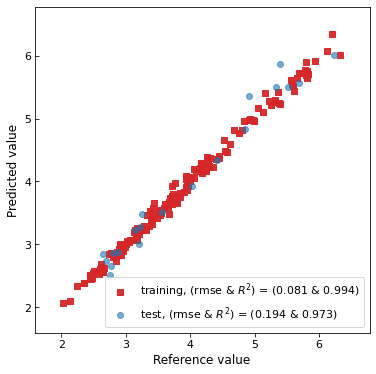

In [3]:
from matsml.models import GPR

# Model parameters
nfold_cv=5                     # Number of folds for cross validation
model_file='M1.pkl'            # Name of the model file to be created
verbosity=0
rmse_cv=False
n_restarts_optimizer=100

model_params={'nfold_cv':nfold_cv,'n_restarts_optimizer':n_restarts_optimizer,'model_file':model_file,
    'verbosity':verbosity,'rmse_cv':rmse_cv}

model=GPR(data_params=data1_params,model_params=model_params)
model.train()
model.plot(pdf_output=False)

#### 3b. Model M2: FCNN on S1

  
  Checking parameters
    all passed                   True
 
  Learning fingerprinted/featured data
    algorithm                    fully connected NeuralNet w/ TensorFlow
    layers                       [5]
    activ_funct                  selu
    epochs                       2000
    optimizer                    nadam
    nfold_cv                     5
  Read data
    data file                    fp_hoips_S1_1dest.csv.gz
    data size                    192
    training size                172 (89.6 %)
    test size                    20 (10.4 %)
    x dimensionality             32
    y dimensionality             1
    y label(s)                   ['Ymean']
  Scaling x                      minmax
    xscaler saved in             xscaler.pkl
  Scaling y                      minmax
  Prepare train/test sets        random
  Building model                 FCNN
  Training model w/ cross validation
    cv,rmse_train,rmse_test,rmse_opt: 0 0.023783 0.040800 0.040800
    cv,rmse_train

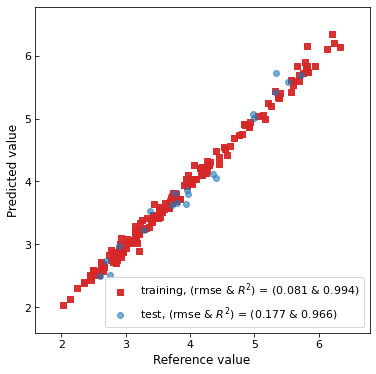

In [4]:
from matsml.models import FCNN

# Model parameters 
layers=[5]                   # list of nodes in hidden layers
epochs=2000                  # Epochs
nfold_cv=5                   # Number of folds for cross validation
use_bias=True                # Use bias term or not
model_file='M2.pkl'          # Name of the model file to be created
verbosity=0                  # Verbosity, 0 or 1
batch_size=32                # Default = 32
loss='mse'
activ_funct='selu'           # Options: "tanh", "relu", and more
optimizer='nadam'            # Options: "Nadam", "Adam", and more

# Dict of model parameters
model_params={'layers':layers,'activ_funct':activ_funct,'epochs':epochs,'nfold_cv':nfold_cv,
    'optimizer':optimizer,'use_bias':use_bias,'model_file':model_file,'loss':loss,
    'batch_size':batch_size,'verbosity':verbosity,'rmse_cv':False}

model=FCNN(data_params=data1_params,model_params=model_params)
model.train()
model.plot(pdf_output=False)

#### 3c. Model M3: FCNN on S2a

  
  Checking parameters
    all passed                   True
 
  Learning fingerprinted/featured data
    algorithm                    fully connected NeuralNet w/ TensorFlow
    layers                       [5, 5]
    activ_funct                  elu
    epochs                       10000
    optimizer                    nadam
    nfold_cv                     5
  Read data
    data file                    fp_hoips_S2a_2dest.csv.gz
    data size                    192
    training size                172 (89.6 %)
    test size                    20 (10.4 %)
    x dimensionality             31
    y dimensionality             2
    y label(s)                   ['Ymean', 'Ystd']
  Scaling x                      minmax
    xscaler saved in             xscaler.pkl
  Scaling y                      minmax
  Prepare train/test sets        random
  Building model                 FCNN
  Training model w/ cross validation
    cv,rmse_train,rmse_test,rmse_opt: 0 0.051967 0.084052 0.084052
    c

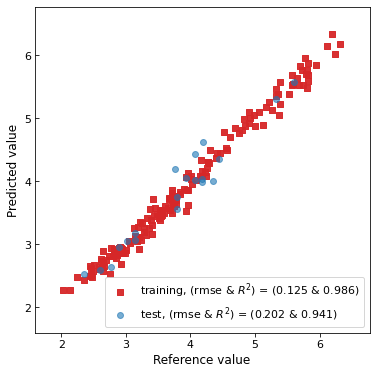

    training, (rmse & R2) = (0.093 & 0.743)
    test, (rmse & R2) = (0.130 & 0.197)
    showing Ystd


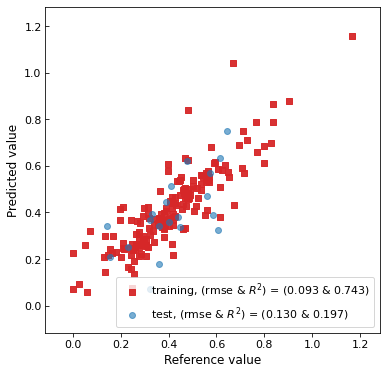

In [5]:
# Model parameters
layers=[5,5]                
epochs=10000                
nfold_cv=5                  
use_bias=True               
model_file='M3.pkl'         
loss='mse'                  
verbosity=0
batch_size=32               
activ_funct='elu' 
optimizer = 'nadam'    

model_params={'layers':layers,'activ_funct':activ_funct,'epochs':epochs,'nfold_cv':nfold_cv,
    'optimizer':optimizer,'use_bias':use_bias,'model_file':model_file,'loss':loss,
    'batch_size':batch_size,'verbosity':verbosity,'rmse_cv':False}

model=FCNN(data_params=data2a_params,model_params=model_params)
model.train()
model.plot(pdf_output=False)

#### 3d. Model M4: FCNN on S2b

  
  Checking parameters
    all passed                   True
 
  Learning fingerprinted/featured data
    algorithm                    fully connected NeuralNet w/ TensorFlow
    layers                       [4, 4]
    activ_funct                  tanh
    epochs                       5000
    optimizer                    nadam
    nfold_cv                     5
  Read data
    data file                    fp_hoips_S2b_1dest.csv.gz
    data size                    384
    training size                345 (89.8 %)
    test size                    39 (10.2 %)
    x dimensionality             53
    y dimensionality             1
    y label(s)                   ['prop_value']
  Scaling x                      minmax
    xscaler saved in             xscaler.pkl
  Scaling y                      minmax
  Prepare train/test sets        random
  Building model                 FCNN
  Training model w/ cross validation
    cv,rmse_train,rmse_test,rmse_opt: 0 0.052922 0.122685 0.122685
    cv,r

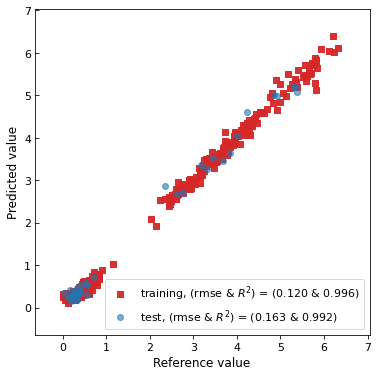

In [6]:
# Model parameters
layers=[4,4]                   
epochs=5000                    
nfold_cv=5                       
use_bias=True                    
model_file='M4.pkl'              
loss='mse'                       
verbosity=0
batch_size=32                  
activ_funct='tanh'             
optimizer='nadam'              
                                 
model_params={'layers':layers,'activ_funct':activ_funct,'epochs':epochs,'nfold_cv':nfold_cv,
    'optimizer':optimizer,'use_bias':use_bias,'model_file':model_file,'loss':loss,
    'batch_size':batch_size,'verbosity':verbosity,'rmse_cv':False}

model=FCNN(data_params=data2b_params,model_params=model_params)
model.train()
model.plot(pdf_output=False)

#### 3e. Model M5: Probabilistic Neural Net on S3

  
  Checking parameters
 
  Learning fingerprinted/featured data
    algorithm                    Probabilistic NeuralNet w/ TensorFlow-Probability
    layers                       [5]
    activ_funct                  selu
    epochs                       200
    optimizer                    nadam
    loss                         negloglik
    nfold_cv                     5
  Read data
    data file                    fp_hoips_S3_4tfp.csv.gz
    data size                    1346
    training size                1346 (100.0 %)
    test size                    0 (0.0 %)
    x dimensionality             221
    y dimensionality             1
    y label(s)                   ['Egap']
  Scaling x                      minmax
    xscaler saved in             xscaler.pkl
  Scaling y                      none
  Prepare train/test sets        random
  Building model                 PrFCNN
  Training PrFCNN w/ cross validation
    cv,rmse_train,rmse_test,rmse_opt: 0 0.603385 0.629704 0.629704
  

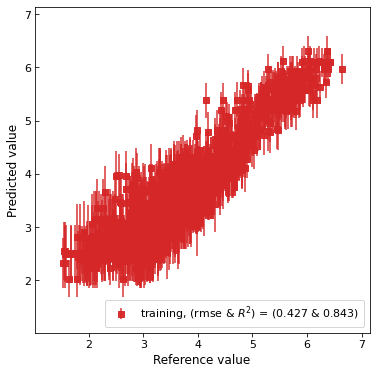

In [7]:
from matsml.models import PrFCNN

layers=[5]
epochs=200                   
nfold_cv=5                       
use_bias=True                    
model_file='M5.pkl'              
loss='mse'                       
verbosity=0
batch_size=32                  
activ_funct='selu'             
optimizer='nadam'              
                                 
model_params={'layers':layers,'activ_funct':activ_funct,'epochs':epochs,'nfold_cv':nfold_cv,
    'optimizer':optimizer,'use_bias':use_bias,'model_file':model_file,'loss':loss,'batch_size':batch_size,
    'verbosity':verbosity,'rmse_cv':False}

model=PrFCNN(data_params=data3_params,model_params=model_params)
model.train()
model.plot(pdf_output=False)

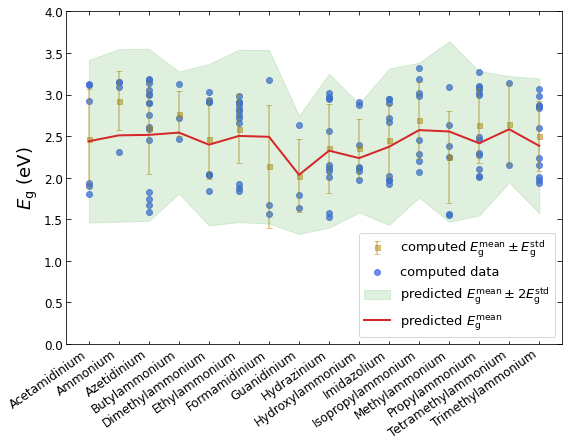

In [8]:
import io, requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

# read the trained data
pred=pd.read_csv('training.csv')

# Trained data provide ID of 1346 cases, but we need the name of the organic cations A, 
# cation B, and anions X also. They can be obtained here
sum_url='http://www.matsml.org/data/hoips2017_comp.csv'
mapping=pd.read_csv(io.StringIO(requests.get(sum_url).content.decode('utf-8')))

# We will plot 16 compositions ASnI3 made of 16 cations A and Sn for B and I for X. 
organics=['Acetamidinium','Ammonium','Azetidinium','Butylammonium','Dimethylammonium','Ethylammonium',
    'Formamidinium','Guanidinium','Hydrazinium','Hydroxylammonium','Imidazolium','Isopropylammonium',
    'Methylammonium','Propylammonium','Tetramethylammonium','Trimethylammonium']
cations = ['Sn']
anions = ['I']

comps = [(organic,cation,anion) for organic in organics for cation in cations\
    for anion in anions]

# 2 DataFrame will be extracted from pred for ploting
bandgap_strs=pd.DataFrame(columns=['cid','id','organic_cat','bandgap'])
bandgap_comp=pd.DataFrame(columns=['cid','mean_comput','std_comput','mean_pred','std_pred'])

# For each of 16 compositions, extract needed data and store in "bandgap_strs" and "bandgap_comp"
for cid in range(len(comps)):
    comp = comps[cid]
    sel_rows = mapping[(mapping['organic']==comp[0]) & \
            (mapping['cation']==comp[1]) &(mapping['anion']==comp[2])]
    sel_ids = list(sel_rows['ID'])
    sel_pred = pred[pred['ID'].isin(sel_ids)]
    sel_pred.reset_index(drop=True, inplace = True)
    bandgap_comp.loc[len(bandgap_comp)]=[cid,np.mean(sel_pred['Egap']), \
            np.std(sel_pred['Egap']),sel_pred.at[0,'md_Egap'], sel_pred.at[0,'md_Egap_err']]
    for idx,eg in zip(list(sel_pred['ID']), list(sel_pred['Egap'])):
        bandgap_strs.loc[len(bandgap_strs)]=[cid,idx,comp[0],eg]

        
# Make figure
fig,ax = plt.subplots(figsize = (8,6),frameon=True)
plt.subplots_adjust(left=0.12, bottom=0.21, right=0.98, top=0.98, wspace=0,
        hspace=0)

plt.rcParams["font.size"] = 16

plt.box(True)
plt.tick_params(axis='x',which='both',bottom=True,top=True,labelbottom=True)
plt.tick_params(axis='y',which='both',right=True,left=True,direction='in',labelleft=True,length=5)

ax.set_ylim([0.0,4.0])

plt.tick_params(axis='x',which='both',direction='in',labelsize=12, top=True)
plt.tick_params(axis='y',which='both',direction='in',labelsize=12, right=True)
ax.set_xticks(np.arange(0, 16, 1))
ax.set_xticklabels(organics, rotation=35, ha='right')
plt.ylabel(r"$E_{\rm g}$ (eV)",color="black",fontsize=18)

ax.scatter(bandgap_strs['cid'], bandgap_strs['bandgap'],color='royalblue',
        alpha = 0.75, zorder=-3, label='computed data')

ax.errorbar(bandgap_comp['cid'],bandgap_comp['mean_comput'], yerr=bandgap_comp['std_comput'], capsize=3,
        color = 'darkgoldenrod', alpha = 0.5, zorder=-3, markersize = 5,
        fmt='s', label=r'computed $E_{\rm g}^{\rm mean} \pm E_{\rm g}^{\rm std}$')

ax.plot(bandgap_comp['cid'], bandgap_comp['mean_pred'],color='tab:red',linewidth = 2,
        label = r'predicted $E_{\rm g}^{\rm mean}$')

ax.fill_between(bandgap_comp['cid'], bandgap_comp['mean_pred'] - 2* bandgap_comp['std_pred'],
        bandgap_comp['mean_pred'] + 2* bandgap_comp['std_pred'], color = '#2ca02c', alpha = 0.15,
        label = r'predicted $E_{\rm g}^{\rm mean} \pm 2E_{\rm g}^{\rm std}$')

handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles, labels, loc="lower right", fontsize = 13)

__Fig. 1.__ Electronic band gap $E_{\rm g}$ (circles) computed for the predicted atomic structures of ASnI$_3$, 16 HOIP formulas corresponding to 16 organic cations A. For each formula, the mean and standard deviation of $E_{\rm g}$, i.e., $E_{\rm g}^{\rm mean}$ and $E_{\rm g}^{\rm std}$, are given by dark golden squares and associated errorbars. Predicted $E_{\rm g}^{\rm mean}$ is given in red while the shaded area indicates the 95-percent confidence interval ($E_{\rm g}^{\rm mean} \pm 2E_{\rm g}^{\rm std}$) of the predictions using the probabilistic model developed in this work